In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.fftpack
%matplotlib inline

In [31]:
df = pd.read_csv("EcommerceCustomers.csv")

In [32]:
list(set(df.dtypes.tolist()))
df = df.select_dtypes(include = 'float64')
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [43]:
y = df["Yearly Amount Spent"]
x = df["Length of Membership"]

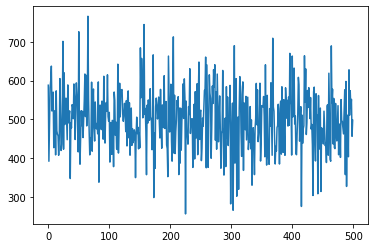

In [44]:
plt.plot(y)
plt.show();

###### rfft - Дискретное преобразование Фурье вещественной последовательности.

In [45]:
w = scipy.fftpack.rfft(y)
f = scipy.fftpack.rfftfreq(len(x), x[1]-x[0])

Метод rfftfreq возвращает частоты выборки для дискретного преобразования Фурье вещественной переменной. В качестве аргументов необходимо передать длину окна и интервал дискретизации.

#### Спектр

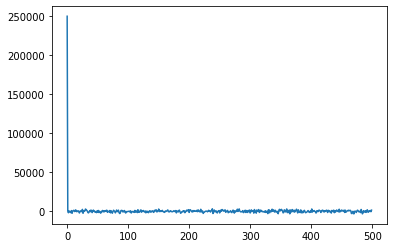

In [46]:
plt.plot(w)
plt.show();

#### Мощность

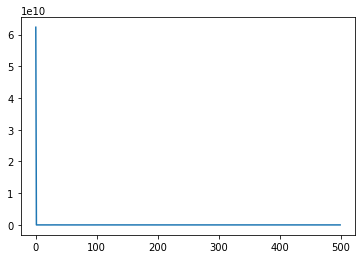

In [51]:
power = w ** 2
plt.plot(power)
plt.show();

###### Зададим порог отсечения

In [52]:
cutoff_idx = power < (power.max() / 5)
w2 = w.copy()
w2[cutoff_idx] = 0

##### Вернемся к исходному временному пространству с использованием обратного дискретного преобразования Фурье irfft.

In [53]:
y2 = scipy.fftpack.irfft(w2)

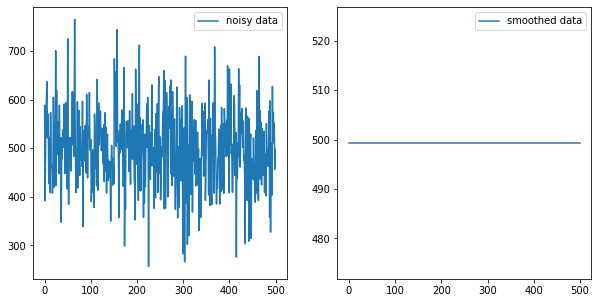

In [54]:
figure = plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(y, label='noisy data')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y2, label='smoothed data')
plt.legend()
plt.show();

## Вейвлет-преобразование

In [55]:
import pywt

In [56]:
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

#### Библиотека pywt предоставляет несколько методов экстраполяции сигнала, например

 - zero (zero-padding) - сигнал расширяется путем добавления нулевых выборок
 - symmetric (symmetric-padding) - сигнал расширяется за счет зеркального отображения выборок
 - periodic (periodic-padding) - сигнал рассматривается как периодический ... more



In [57]:
pywt.Modes.modes

['zero',
 'constant',
 'symmetric',
 'periodic',
 'smooth',
 'periodization',
 'reflect',
 'antisymmetric',
 'antireflect']

######  Уровень декомпозиции должен быть >= 0. Если уровень равен None (по умолчанию), то он будет вычисляться с помощью функции dwt_max_level.

In [58]:
# wavelet type
wavelet_type = 'sym6'
w = pywt.Wavelet(wavelet_type)
# phi, psi, x = w.wavefun(level=6)

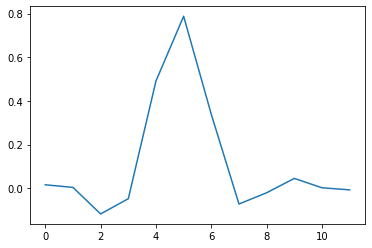

In [59]:
plt.plot(w.dec_lo)
plt.show();

In [60]:
level = pywt.dwt_max_level(len(y), w)
coeffs = pywt.wavedec(data=y, wavelet=w, mode='periodization', level=level)

Зададим порог для уровня фильтрации.

Для непосредственной фильтрации коэффициентов воспользуемся функцией pywt.threshold. Для ее использования необходимо определить режим фильтрации (mode): soft, hard, greater, less.


In [61]:
threshold = 0.1
filtered_coeffs = []

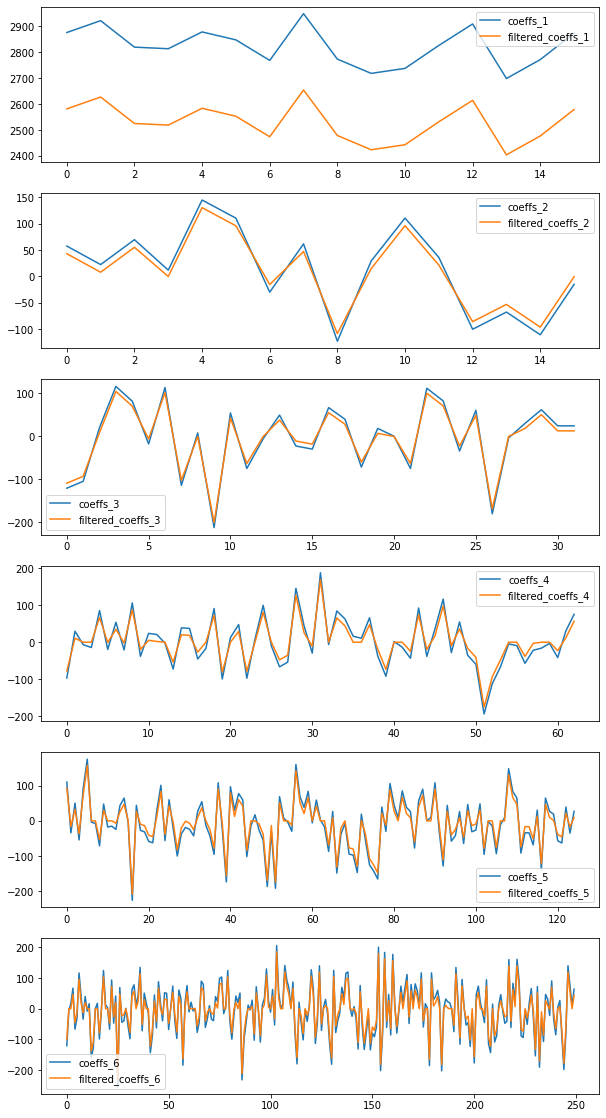

In [62]:
plt.figure(figsize=(10, 20))
for i in range(0, len(coeffs)):
    plt.subplot(len(coeffs), 1, i+1)
    plt.plot(coeffs[i], label='coeffs_' + str(i+1))
    filtered_coeffs.append(pywt.threshold(coeffs[i], threshold * max(coeffs[i]), mode='soft'))
    plt.plot(filtered_coeffs[-1], label='filtered_coeffs_' + str(i+1))
    plt.legend()
plt.show();

Восстановим сигнал с отфильтрованными коэффициентами

In [63]:
datarec = pywt.waverec([filtered_coeffs[0]], w)

Отобразим результаты

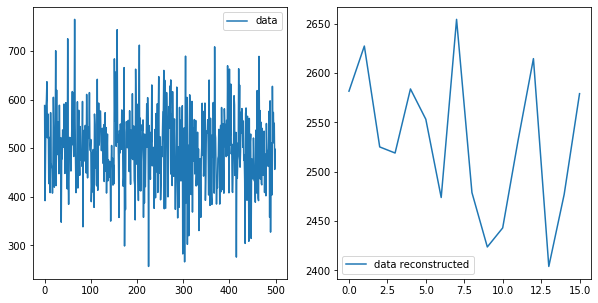

In [64]:
figure = plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(y, label='data')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(datarec, label='data reconstructed')
plt.legend()
plt.show();